# COGS 108 - Final Project 

# Overview

Overview:
given the topic of health inspections and the prompt of: Imagine you work for a local city government and want to improve the restaurant health inspection process for the city government. I really wanted to know if a certain restaurant sold a type of food would they have more violations.

Results:Meat based restaurants had more violations on average than places that sold salads. 

# Name & PID

- Name: Peter Kirov
- PID: A15753179

# Research Question

If a restaurant serves certain types of foods are there more violations, resulting in a need for more regular inspections on those restaurants?

## Background and Prior Work

I am asking this question based off of the guidelines that health inspectors use to rate kitchens. I found a few guidelines.
    
    1)Storing raw ingredients under dripping meat(lightspeed)
    2)Lack of general cleanliness (lightspeed)
    3)mislabeling bottles.(lightspeed)

Most Restaurants will always try to keep their kitchens clean so what could make a restaurants violations increase would seem to be something along the lines of if you sell a lot of salad then you might have mislabeled bottles of vinagrette and bleach for example. It is unlikely but mislabeling bottles can lead to pretty bad consequences. Also a restaurant that does not keep good track of its meat filled environment can go bad really quickly.
On another website I found some of the top major violations of a restaurant would be keeping things hot or cold. If you think about an Ice machine those can get mold very quickly if not properly taken care of so places that serve ice cream could lead to more safety violations.
    
    1)Proper hot and cold holding temperatures — This violation can occur  in reach-in refrigeration lowboys, top-cold holding units, walk-in refrigerators, and on stovetops. Have thermometers present. The only way you can control the rapid growth of bacteria is to make sure food is held outside of the temperature danger zone, which is between 41ºF and 135ºF or 140ºF (the required level depends on your local health department guidelines).
References (include links):
- 1)https://www.lightspeedhq.com/blog/restaurant-health-inspection/
- 2)https://www.menucoverdepot.com/resource-center/articles/restaurant-health-inspections/

# Hypothesis


I believe that if a restaurant does serve any meat based foods they will be more likely to recieve safety violations. 

Like I wrote in the background if a restaurant serves meats or sandwiches or things where it is required to be stored at a lower temperature it is likely that they might might have more violations.

# Dataset(s)


All of my data has come from the professor as this is the individual project.

restaurants.csv
----
- Number of observations:3324

Description:
- This is a list of all the restaurants that contain what type of establishment it is and the name and hsisid of the restaurants.

violations.csv
--
- Number of observations:189802

Description:

- This is a list of violations of a majority of the restaurants in the restaurants.csv


yelp.csv
----------
- Number of observations:3688

Description:

- This dataset contains the types of food and and whether or not the restaurant is closed or opened, where it is located and the price points of each restaurant.


If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

- I plan to combine these inorder to get the restaurant and the violations and the types of food all together in one place.

# Setup

In [61]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns
sns.set()
sns.set_context('talk')
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [62]:
#import all the necessary data
restaurants_df = pd.read_csv("data/restaurants.csv")
violations_df = pd.read_csv("data/violations.csv")
yelp_df = pd.read_csv("data/yelp.csv") 


# show

In [63]:
restaurants_df.head()

,X.objectid,hsisid,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,facilitytype,x,y,geocodestatus
0,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,NaN,RALEIGH,NC,27616-1895,(919) 977-3679,2016-05-26T00:00:00.000Z,Restaurant,-78.591634,35.855487,M
1,1002,4092040338,CAROLINA CLASSIC HOT DOGS #2 (WCID #549),309 HOLLOMAN ST,NaN,APEX,NC,27502,NaN,2016-07-01T00:00:00.000Z,Pushcarts,-78.855348,35.730219,M
2,1003,4092014444,Taco Bell #22798,2207 S MAIN ST,NaN,WAKE FOREST,NC,27587,(919) 554-4924,2005-12-05T00:00:00.000Z,Restaurant,-78.536145,35.946695,M
3,1004,4092015333,THE REMEDY DINER,137 E HARGETT ST,NaN,RALEIGH,NC,27601,(919) 835-3553,2009-02-04T00:00:00.000Z,Restaurant,-78.636895,35.777999,M
4,1005,4092160069,ZEBULON HOUSE (KITCHEN),551 PONY RD,NaN,ZEBULON,NC,27597,NaN,2009-02-18T00:00:00.000Z,Institutional Food Service,-78.332138,35.816779,M


In [64]:
violations_df.head()

,X.objectid,hsisid,inspectdate,category,statecode,critical,questionno,violationcode,severity,shortdesc,inspectedby,comments,pointvalue,observationtype,violationtype,count,cdcriskfactor,cdcdataitem
0,2149,4092015279,2014-09-22T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found unlabele...,0,Out,R,NaN,NaN,NaN
1,2150,4092014572,2014-09-29T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Daryl Beasley,7-102.11; Priority Foundation; One sanitizer b...,0,Out,CDI,NaN,NaN,NaN
2,2151,4092015906,2014-10-01T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found an unlab...,1,Out,CDI,NaN,NaN,NaN
3,2152,4092013840,2014-10-08T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found unlabele...,0,Out,CDI,NaN,NaN,NaN
4,2153,4092021788,2014-10-09T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found one unla...,0,Out,CDI,NaN,NaN,NaN


In [65]:
yelp_df.head()

,id,name,is_closed,rating,review_count,address1,zip_code,latitude,longitude,price,phone,hotdogs,sandwiches,pizza,tradamerican,burgers,mexican,grocery,breakfast_brunch,coffee,chinese,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
0,42nd-street-oyster-bar-rdu-airport-morrisville,42nd street oyster bar - rdu airport,False,2.5,23,2400 John Brantley Blvd,27560,35.873808,-78.790896,$$,NaN,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False
1,aldi-foods-cary,aldi foods,False,4.0,17,2303 NW Maynard Rd,27519,35.802840,-78.785930,$,NaN,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,luciano-pizzeria-ristorante-northwest-raleigh,luciano pizzeria ristorante,False,5.0,2,Crabtree Valley Mall,27612,35.839681,-78.678791,$,12102230500,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,olive-garden-italian-restaurant-wilson,olive garden italian restaurant,False,3.0,16,3401 Raleigh Rd Pkwy W,27893,35.743170,-77.964160,$$,12522061399,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
4,subway-wilson-4,subway,False,3.5,3,4934 Raleigh Rd,27896,35.762936,-77.999428,$,12522067187,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Data Cleaning

Describe your data cleaning steps here.

# clean restaurants

In [66]:
#most important features from each dataframe needs to be kept everything else needs to be dropped
restaurants_df.columns

Index(['X.objectid', 'hsisid', 'name', 'address1', 'address2', 'city', 'state',
       'postalcode', 'phonenumber', 'restaurantopendate', 'facilitytype', 'x',
       'y', 'geocodestatus'],
      dtype='object')

In [67]:
restaurants_df = restaurants_df.drop(['X.objectid','address2', 'city', 'state','phonenumber','restaurantopendate','geocodestatus'], axis=1)


In [68]:
def fix_zip(string):
    string = string.split('-')
    return string[0]
def standardize_lat_long(value):
    return round(value, 5)

In [69]:

#make it so that it is only restaurants
restaurants_df = restaurants_df[restaurants_df['facilitytype'] == 'Restaurant']
#remove the 0,0 x,y coordinates
deleteIndexes = restaurants_df[(restaurants_df['x'] == 0.0)& (restaurants_df['y'] == 0.0)].index
restaurants_df.drop(deleteIndexes , inplace=True)
#make all zipcodes strings
restaurants_df = restaurants_df.rename(columns={'postalcode': 'zip_code'})
restaurants_df['zip_code'] = restaurants_df['zip_code'].astype(str)
#standardize all the zip codes
restaurants_df['zip_code'] = restaurants_df['zip_code'].apply(fix_zip)
#standardize all the latitudes and longitudes
restaurants_df['x'] = restaurants_df['x'].apply(standardize_lat_long)
restaurants_df['y'] = restaurants_df['y'].apply(standardize_lat_long)
#drop all null values
restaurants_df = restaurants_df.dropna()
restaurants_df.head()

,hsisid,name,address1,zip_code,facilitytype,x,y
0,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616,Restaurant,-78.59163,35.85549
2,4092014444,Taco Bell #22798,2207 S MAIN ST,27587,Restaurant,-78.53614,35.94669
3,4092015333,THE REMEDY DINER,137 E HARGETT ST,27601,Restaurant,-78.63689,35.77800
6,4092016679,BITTERSWEET,16 E MARTIN ST,27601,Restaurant,-78.64002,35.77714
7,4092014493,Chick-fil-A #1573,8901 Brier Creek PKY,27617,Restaurant,-78.79050,35.90107


# clean violations

In [70]:
violations_df.columns

Index(['X.objectid', 'hsisid', 'inspectdate', 'category', 'statecode',
       'critical', 'questionno', 'violationcode', 'severity', 'shortdesc',
       'inspectedby', 'comments', 'pointvalue', 'observationtype',
       'violationtype', 'count', 'cdcriskfactor', 'cdcdataitem'],
      dtype='object')

In [71]:
violations_df = violations_df.drop(['statecode','severity','X.objectid',  'count', 'cdcriskfactor', 'cdcdataitem', 'observationtype', 'violationtype','shortdesc', 'inspectedby', 'comments','questionno'], axis = 1)


In [72]:
deleteIndexes = violations_df[(violations_df['critical'] == 'No')].index
violations_df.drop(deleteIndexes , inplace=True)
violations_df.dropna()
violations_df.head()

,hsisid,inspectdate,category,critical,violationcode,pointvalue
0,4092015279,2014-09-22T00:00:00.000Z,Chemical,Yes,7-102.11,0
1,4092014572,2014-09-29T00:00:00.000Z,Chemical,Yes,7-102.11,0
2,4092015906,2014-10-01T00:00:00.000Z,Chemical,Yes,7-102.11,1
3,4092013840,2014-10-08T00:00:00.000Z,Chemical,Yes,7-102.11,0
4,4092021788,2014-10-09T00:00:00.000Z,Chemical,Yes,7-102.11,0


In [73]:
violations_df = violations_df.sort_values(by=['hsisid'])
violations_list = []

curr_dict = {}
for row in violations_df.itertuples():
    if curr_dict.get(row[1]) != None:
        curr_dict[row[1]] +=1
    else:
        curr_dict[row[1]] = 1

hsisid_list = list(curr_dict)
nums=list(curr_dict.values())
curr_dict = {'hsisid':hsisid_list, 'num_violations':nums}
violation_nums_df = pd.DataFrame.from_dict(curr_dict)

violation_nums_df.head()

,hsisid,num_violations
0,4092010018,47
1,4092010024,26
2,4092010031,12
3,4092010035,10
4,4092010037,14


# clean yelp

In [74]:
yelp_df.head(1)

,id,name,is_closed,rating,review_count,address1,zip_code,latitude,longitude,price,phone,hotdogs,sandwiches,pizza,tradamerican,burgers,mexican,grocery,breakfast_brunch,coffee,chinese,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
0,42nd-street-oyster-bar-rdu-airport-morrisville,42nd street oyster bar - rdu airport,False,2.5,23,2400 John Brantley Blvd,27560,35.873808,-78.790896,$$,NaN,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False


In [75]:
yelp_df = yelp_df.drop([ 'price', 'rating', 'review_count', 'mexican', 'grocery', 'chinese', 'italian', 'newamerican', 'tradamerican', 'bakeries','phone','id'],axis =1)
yelp_df[yelp_df['name'] == 'spring cafe']

,name,is_closed,address1,zip_code,latitude,longitude,hotdogs,sandwiches,pizza,burgers,breakfast_brunch,coffee,chicken_wings,delis,bars,salad,seafood,bbq,sushi
3557,spring cafe,False,2900 Spring Forest Rd,27616,35.85495,-78.59114,False,True,False,False,True,False,False,False,False,False,False,False,False


In [76]:
yelp_df.head(1)

,name,is_closed,address1,zip_code,latitude,longitude,hotdogs,sandwiches,pizza,burgers,breakfast_brunch,coffee,chicken_wings,delis,bars,salad,seafood,bbq,sushi
0,42nd street oyster bar - rdu airport,False,2400 John Brantley Blvd,27560,35.873808,-78.790896,False,False,False,False,True,False,False,False,False,False,True,False,False


In [77]:
#find all indices where there is no description of the food
deleteIndexs = yelp_df[(yelp_df['hotdogs'] == False)& (yelp_df['sandwiches'] == False)& (yelp_df['pizza'] == False)& (yelp_df['burgers'] == False)& (yelp_df['breakfast_brunch'] == False) & (yelp_df['coffee'] == False)& (yelp_df['chicken_wings'] == False)& (yelp_df['delis'] == False)& (yelp_df['bars'] == False)& (yelp_df['salad'] == False)& (yelp_df['seafood'] == False)& (yelp_df['bbq'] == False)& (yelp_df['sushi'] == False)].index



In [78]:
#drop all those indices
yelp_df.drop(deleteIndexs , inplace=True)

In [79]:

yelp_df = yelp_df.rename(columns={'latitude': 'y', 'longitude': 'x'})

In [80]:
deleteIndexes = yelp_df[(yelp_df['x'] == 0.0)& (yelp_df['y'] == 0.0)].index
yelp_df.drop(deleteIndexes , inplace=True)
yelp_df['zip_code'] = yelp_df['zip_code'].astype(str)
yelp_df['zip_code'] = yelp_df['zip_code'].apply(fix_zip)
yelp_df = yelp_df.dropna()
yelp_df = yelp_df[['name', 'is_closed', 'address1','zip_code', 'x','y','hotdogs','sandwiches','pizza','burgers','breakfast_brunch','coffee','chicken_wings','delis','bars','salad','seafood','bbq','sushi']]
yelp_df['x'] = yelp_df['x'].apply(standardize_lat_long)
yelp_df['y'] = yelp_df['y'].apply(standardize_lat_long)
yelp_df.head()

,name,is_closed,address1,zip_code,x,y,hotdogs,sandwiches,pizza,burgers,breakfast_brunch,coffee,chicken_wings,delis,bars,salad,seafood,bbq,sushi
0,42nd street oyster bar - rdu airport,False,2400 John Brantley Blvd,27560,-78.79090,35.87381,False,False,False,False,True,False,False,False,False,False,True,False,False
3,olive garden italian restaurant,False,3401 Raleigh Rd Pkwy W,27893,-77.96416,35.74317,False,False,False,False,False,False,False,False,False,True,False,False,False
4,subway,False,4934 Raleigh Rd,27896,-77.99943,35.76294,True,True,False,False,False,False,False,False,False,False,False,False,False
7,bojangles,False,5033 Raleigh Rd Pkwy W,27896,-78.00893,35.76357,True,False,False,False,False,False,False,False,False,False,False,False,False
9,best-n-burgers,False,4916 Hayes Pl,27893,-78.00720,35.76229,False,False,False,True,False,False,False,False,False,False,False,False,False


# merging the restaurants and its violations

In [81]:
#here I combined the restaurants and violations by the hsisid column
restaurants_viol_df = pd.merge(restaurants_df, violation_nums_df,on=['hsisid'],how='inner')

In [82]:
restaurants_viol_df.columns

Index(['hsisid', 'name', 'address1', 'zip_code', 'facilitytype', 'x', 'y',
       'num_violations'],
      dtype='object')

In [83]:
restaurants_viol_df.head()

,hsisid,name,address1,zip_code,facilitytype,x,y,num_violations
0,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616,Restaurant,-78.59163,35.85549,15
1,4092014444,Taco Bell #22798,2207 S MAIN ST,27587,Restaurant,-78.53614,35.94669,21
2,4092015333,THE REMEDY DINER,137 E HARGETT ST,27601,Restaurant,-78.63689,35.77800,37
3,4092016679,BITTERSWEET,16 E MARTIN ST,27601,Restaurant,-78.64002,35.77714,9
4,4092014493,Chick-fil-A #1573,8901 Brier Creek PKY,27617,Restaurant,-78.79050,35.90107,16


# merging the restaurant violations with the yelp description of what food is being sold

In [84]:
len(yelp_df.address1.unique())

1385

In [85]:
yelp_df[yelp_df['name'] == 'spring cafe']

,name,is_closed,address1,zip_code,x,y,hotdogs,sandwiches,pizza,burgers,breakfast_brunch,coffee,chicken_wings,delis,bars,salad,seafood,bbq,sushi
3557,spring cafe,False,2900 Spring Forest Rd,27616,-78.59114,35.85495,False,True,False,False,True,False,False,False,False,False,False,False,False


In [86]:
len(restaurants_viol_df.name.unique())

1928

In [87]:
restaurants_viol_df.head()

,hsisid,name,address1,zip_code,facilitytype,x,y,num_violations
0,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616,Restaurant,-78.59163,35.85549,15
1,4092014444,Taco Bell #22798,2207 S MAIN ST,27587,Restaurant,-78.53614,35.94669,21
2,4092015333,THE REMEDY DINER,137 E HARGETT ST,27601,Restaurant,-78.63689,35.77800,37
3,4092016679,BITTERSWEET,16 E MARTIN ST,27601,Restaurant,-78.64002,35.77714,9
4,4092014493,Chick-fil-A #1573,8901 Brier Creek PKY,27617,Restaurant,-78.79050,35.90107,16


# merge restaurant violations with yelp data

In [88]:
#here I combined the restaurants and violations with the yelp data by the x and y of the restaurants locations
restaurants_viol_yelp_df = pd.merge(restaurants_viol_df,yelp_df,on=['x','y'],how='inner')

In [89]:
restaurants_viol_yelp_df.columns

Index(['hsisid', 'name_x', 'address1_x', 'zip_code_x', 'facilitytype', 'x',
       'y', 'num_violations', 'name_y', 'is_closed', 'address1_y',
       'zip_code_y', 'hotdogs', 'sandwiches', 'pizza', 'burgers',
       'breakfast_brunch', 'coffee', 'chicken_wings', 'delis', 'bars', 'salad',
       'seafood', 'bbq', 'sushi'],
      dtype='object')

In [90]:

def make_lower(string):
    string = string.lower()
    string = string.strip()
    string = string.replace('.','')
    string = string.replace('  ',' ')
    string = string.replace('blvd', 'boulevard')
    string = string.replace('avenue', 'ave')
    string = string.replace('street', 'st')
    string = string.replace('500 e broad st','500 broad st')
    string = string.replace('pky', 'pkwy')
    string = string.replace('522 st mary\'s st','522 saint marys st')
    string = string.replace('unit c', '')
    string = string.replace('2840 e millbrook rd', '2840 millbrook rd')
    
    return string
restaurants_viol_yelp_df['address1_x'] = restaurants_viol_yelp_df['address1_x'].apply(make_lower)
restaurants_viol_yelp_df['address1_y'] = restaurants_viol_yelp_df['address1_y'].apply(make_lower)

In [91]:
indices = restaurants_viol_yelp_df[restaurants_viol_yelp_df['address1_x'] != restaurants_viol_yelp_df['address1_y']].index
restaurants_viol_yelp_df.drop(indices , inplace=True)
restaurants_viol_yelp_df
#sum up colum
#

,hsisid,name_x,address1_x,zip_code_x,facilitytype,x,y,num_violations,name_y,is_closed,address1_y,zip_code_y,hotdogs,sandwiches,pizza,burgers,breakfast_brunch,coffee,chicken_wings,delis,bars,salad,seafood,bbq,sushi
0,4092014569,Sushi Thai,106 kilmayne dr,27511,Restaurant,-78.78304,35.77049,44,sushi thai cary,False,106 kilmayne dr,27511,False,False,False,False,False,False,False,False,False,False,False,False,True
2,4092015856,PIZZA HUT #9210,321 n main st,27540,Restaurant,-78.83512,35.65583,14,pizza hut,False,321 n main st,27540,False,False,True,False,False,False,True,False,False,False,False,False,False
3,4092014288,Stromboli`s,2900 spring forest rd,27616,Restaurant,-78.59114,35.85495,54,spring cafe,False,2900 spring forest rd,27616,False,True,False,False,True,False,False,False,False,False,False,False,False
5,4092016414,GARLAND,14 w martin st,27601,Restaurant,-78.63980,35.77713,26,neptune's parlour,False,14 w martin st,27601,False,False,False,False,False,False,False,False,True,False,False,False,False
6,4092015669,KINGS BARCADE &amp; NEPTUNE`S PARLOR,14 w martin st,27601,Restaurant,-78.63980,35.77713,10,neptune's parlour,False,14 w martin st,27601,False,False,False,False,False,False,False,False,True,False,False,False,False
7,4092016057,JACK'S SEAFOOD,5416 rock quarry rd,27610,Restaurant,-78.56010,35.73196,39,jack's seafood and soul food,False,5416 rock quarry rd,27610,False,False,False,False,False,False,False,False,False,False,True,False,False
8,4092010070,Bojangles # 3,1013 new bern ave,27601,Restaurant,-78.62299,35.78024,14,bojangles,False,1013 new bern ave,27601,False,False,False,False,False,False,True,False,False,False,False,False,False
9,4092015972,BOJANGLES #46,1513 n arendell ave,27597,Restaurant,-78.32656,35.83982,23,bojangles,False,1513 n arendell ave,27597,True,False,False,False,False,False,True,False,False,False,False,False,False
11,4092016453,MCDONALDS #4997,1700 trawick rd,27604,Restaurant,-78.57713,35.79908,22,mcdonald's,False,1700 trawick rd,27604,True,False,False,True,False,False,False,False,False,False,False,False,False
12,4092014990,Texas Roadhouse #294,11440 capital boulevard,27587,Restaurant,-78.54034,35.95646,34,texas roadhouse,False,11440 capital boulevard,27587,False,False,False,False,False,False,False,False,False,False,False,True,False


In [92]:
#i have created all of my dataframes containing the restaurants that serve all different kinds of food
sushi_df = restaurants_viol_yelp_df[restaurants_viol_yelp_df['sushi'] == True]
bbq_df = restaurants_viol_yelp_df[restaurants_viol_yelp_df['bbq'] == True]
seafood_df = restaurants_viol_yelp_df[restaurants_viol_yelp_df['seafood'] == True]
salad_df = restaurants_viol_yelp_df[restaurants_viol_yelp_df['salad'] == True]
bars_df = restaurants_viol_yelp_df[restaurants_viol_yelp_df['bars'] == True]
delis_df = restaurants_viol_yelp_df[restaurants_viol_yelp_df['delis'] == True]
chicken_wings_df = restaurants_viol_yelp_df[restaurants_viol_yelp_df['chicken_wings'] == True]
coffee_df = restaurants_viol_yelp_df[restaurants_viol_yelp_df['coffee'] == True]
burgers_df = restaurants_viol_yelp_df[restaurants_viol_yelp_df['burgers'] == True]
pizza_df = restaurants_viol_yelp_df[restaurants_viol_yelp_df['pizza'] == True]
sandwiches_df = restaurants_viol_yelp_df[restaurants_viol_yelp_df['sandwiches'] == True]
hotdogs_df = restaurants_viol_yelp_df[restaurants_viol_yelp_df['hotdogs'] == True]


In [93]:
#create a new dataframe with type of food and number of violations in 2 columns
list_of_foods = ['sushi', 'bbq', 'seafood', 'salad', 'bars', 'delis', 'chicken wings', 'coffee', 'burgers', 'pizza', 'sandwiches', 'hotdogs']
list_of_nums = [7,4,7,14,10,3,9,8,18,14,21,20]
dict_of_foods = {'foods' : list_of_foods, 'num_restaurants': list_of_nums}
food_df = pd.DataFrame.from_dict(dict_of_foods)
food_df

,foods,num_restaurants
0,sushi,7
1,bbq,4
2,seafood,7
3,salad,14
4,bars,10
5,delis,3
6,chicken wings,9
7,coffee,8
8,burgers,18
9,pizza,14


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [94]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
#chi squared observed to expected
#here I want to use a chi squared test to see whether or not there is a difference in 

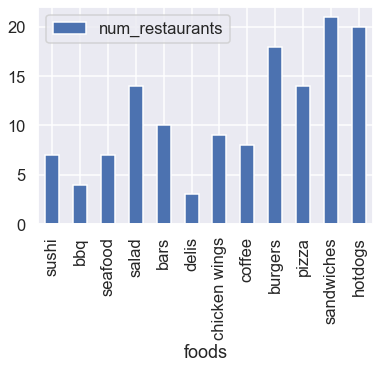

In [95]:
food_df.plot(x='foods', y='num_restaurants', kind='bar')

This graph is meant to show you how many of each restaurant is in each category of food.

In [96]:
list_of_foods = ['sushi', 'bbq', 'seafood', 'salad', 'bars', 'delis', 'chicken wings', 'coffee', 'burgers', 'pizza', 'sandwiches', 'hotdogs']
list_of_nums = [sushi_df.num_violations.mean(),bbq_df.num_violations.mean(),seafood_df.num_violations.mean(),salad_df.num_violations.mean(),bars_df.num_violations.mean(),delis_df.num_violations.mean(),chicken_wings_df.num_violations.mean(),coffee_df.num_violations.mean(),burgers_df.num_violations.mean(),pizza_df.num_violations.mean(),sandwiches_df.num_violations.mean(),hotdogs_df.num_violations.mean()]
dict_of_foods_ave = {'foods' : list_of_foods, 'num_viol_avgs': list_of_nums}
food_ave_df = pd.DataFrame.from_dict(dict_of_foods_ave)
food_ave_df

,foods,num_viol_avgs
0,sushi,27.142857
1,bbq,20.500000
2,seafood,25.714286
3,salad,16.428571
4,bars,21.900000
5,delis,12.333333
6,chicken wings,30.111111
7,coffee,10.375000
8,burgers,24.500000
9,pizza,23.714286


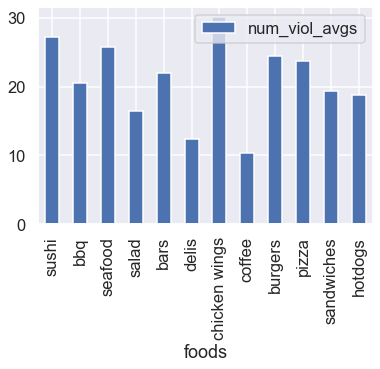

In [97]:
food_ave_df.plot(x='foods', y='num_viol_avgs', kind='bar')

This graph shows you what the average number of violations in each food restaurant was.

# Ethics & Privacy

Considering the fact that all health inspections of restaurants that are done by the government are public there is no privacy issue with the data being gathered.I think that there will be potential biases in the study that I would be conducting. First of all there are problems with how health inspectors judge restaurants in the first place. Therefore I have taken out all restaurants that have classifiers of some sort of cultural food. Many of them judge the same place many times in a row and if they have a problem with the owner after the first time the inspector might give harsher scores.


# Conclusion & Discussion

I think that based on this data alone I see that there are more violations from kitchens that sell primarily meat based foods compared to a coffee shop and salad places. Places like Chicken Wings, sushi, burgers, pizza, sandwiches, hotdogs. All of these have signigificantly higher amounts of violations and as I said in my hyposthesis I believed that places that sold meat products moreso would have higher amounts of violations and the average number of violations as per these restaurants does appear to support that hypothesis.

Discussion:

I was very limited in the number of restaurants I had and I think that the reason the salad restaurants and coffee shops had such a low number of violations was because there was just not that big a representation of salad restaurants. I do think that that could also mean salad restaurants just do not commit as many critical violations as meat restaurants do. This was also based off data from a very small geolocation which can explain why my values were so small. If we got our data from somewhere with a higher concentration of restaurants I would be able to have a much more expansive dataset of restaurants to choose from.